In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_moons

In [ ]:
num_samples_total=1000
training_split=250

In [ ]:
X,targets=make_moons(n_samples=num_samples_total)
targets[np.where(targets==0)]=-1
X_training=X[training_split:,:]
X_testing=X[:training_split,:]
targets_training=targets[training_split:]
targets_testing=targets[:training_split]

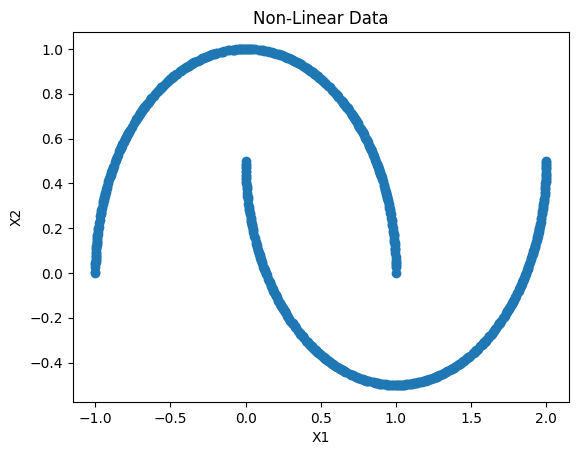

In [ ]:
plt.scatter(X_training[:,0],X_training[:,1])
plt.title("Non-Linear Data")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [ ]:
feature_vector_shape=len(X_training[0])
input_shape=(feature_vector_shape,)
print(f'Feature Shape:{input_shape}')

Feature Shape:(2,)


In [ ]:
model=Sequential()
model.add(Dense(50,input_shape=input_shape,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1,activation='tanh'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='squared_hinge',metrics=['accuracy'])
model.fit(X_training,targets_training,epochs=50,batch_size=25,verbose=1,validation_split=0.2)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.0028 - loss: 1.6036 - val_accuracy: 0.1333 - val_loss: 1.1338
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1993 - loss: 0.8654 - val_accuracy: 0.2733 - val_loss: 0.5053
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3104 - loss: 0.4681 - val_accuracy: 0.3067 - val_loss: 0.3382
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3338 - loss: 0.3877 - val_accuracy: 0.3133 - val_loss: 0.3034
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3708 - loss: 0.3371 - val_accuracy: 0.3200 - val_loss: 0.2919
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3104 - loss: 0.3231 - val_accuracy: 0.3200 - val_loss: 0.2818
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3622 - loss: 0.3190 - val_accuracy: 0.3467 - val_loss: 0.2735
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3546 - loss: 0.3094 - val_accuracy: 0.3333 - val_loss

In [ ]:
test_results=model.evaluate(X_testing,targets_testing,verbose=1)
print(f'Test Results - Loss:{test_results[0]} - Accuracy:{test_results[1]}')

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3889 - loss: 0.1370  
Test Results - Loss:0.15157818794250488 - Accuracy:0.42800000309944153


9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


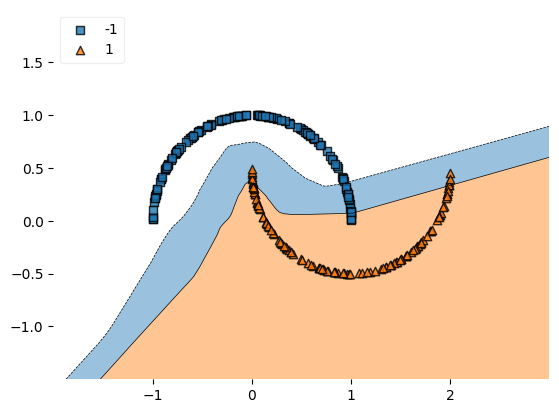

In [ ]:
plot_decision_regions(X_testing,targets_testing,clf=model,legend=2)
plt.show()